In [258]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


# Task 2.1

In [259]:
#defines function used in one step algorithm with function input a vector z
def SVMfunc(z, x, y, beta, bias):
    return (bias + sum(beta[l]*y[l]*np.dot(z, x[l]) for l in range(len(beta))))

def SVMfunc2(z, x, y, beta, bias):
    ans=bias+(y*(z@x.T))@beta
    return(ans)

In [260]:
def OneStep(i,j, x, y, beta, bias, C):
    delta = y[i]*((SVMfunc(x[j], x, y, beta, bias)-y[j]) - (SVMfunc(x[i], x, y, beta, bias) - y[i]))
    s = y[i]*y[j]
    chi = np.dot(x[i],x[i]) + np.dot(x[j],x[j]) - 2*np.dot(x[i],x[j])
    gamma = s*beta[i] + beta[j]
    
    if s==1:
        L= max(0, gamma -1*C)
        H = min(gamma, C)
    
    else:
        L = max(0, -1*gamma)
        H = min(C, C-gamma)
    
    if chi>0:
        beta[i] = min(max(beta[i] + delta/chi, L), H)
    elif delta > 0:
        beta_new[i] = L
    else:
        beta[i] = H
    beta[j] = gamma - s * beta[i]
    bias = bias - 0.5 * (SVMfunc(x[j], x, y, beta, bias) - y[j] + SVMfunc(x[i], x, y, beta, bias) - y[i])
    return (beta, bias)
        

# Task 2.2

In [273]:
#draws 
def expTestData(SampleSize, scale1, scale2):
    #draw SampleSize by 2 points according to exp distribution with lambda =4,0.5 resp.
    x1 = np.random.exponential(scale=scale1, size = (SampleSize,2))
    x2 = np.random.exponential(scale=scale2, size = (SampleSize,2))

    #label points in x1 by -1 and points in x2 by 1
    y2 = np.ones(SampleSize)
    y1 = np.full(SampleSize, -1)

    #join all data points into x matrix and y matrix
    x = np.concatenate((x1, x2), axis =0)
    y = np.concatenate((y1, y2), axis=0)
    
    return(x,y)

x, y = expTestData(20, 0.25, 2)


0.0010042190551757812
0.0010018348693847656


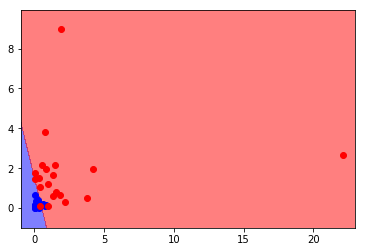

In [274]:
z=np.array([1,1])

bias=0
beta=np.ones(40)

start = time.time()
SVMfunc(z,x,y,beta,bias)
end = time. time()
print(end - start)

start = time.time()
SVMfunc2(z,x,y,beta,bias)
end=time.time()
print(end - start)

conplot(x,y,100,10)
plt.show()

# Task 2.3

In [263]:
def SMO(x, y, iterations, C):
    n = len(x)
    beta = np.zeros(n)
    bias = 0
    
    for k in range(iterations):
        #picks two non equal integers from 0 to n
        i, j = np.random.choice(n, 2)
        
        #updates beta and bias according to onestep algorithm
        beta, bias = OneStep(i,j, x, y, beta, bias, C)
    
    s=(SVMfunc2(x,x,y,beta,bias)-y)[beta!=0]
    bias=bias-np.median(s)
    
    return (beta,bias)  


In [264]:
SMO(x,y,20,10)

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.06122019,
         0.        ,  0.        ,  0.        ,  0.82318485,  0.        ,
         0.        ,  0.        ,  0.0689424 ,  0.        ,  0.12392326,
         0.        ,  0.        ,  0.        ,  0.        ,  0.03200979,
         0.        ,  0.        ,  0.03200979,  0.06122019,  0.        ,
         0.        ,  0.        ,  0.        ,  0.0689424 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.12392326,  0.        ,  0.82318485,  0.        ]),
 -1.5804530014778093)

# Task 2.4

In [265]:
x_testdata, y_testdata = expTestData(1000, )

TypeError: expTestData() missing 2 required positional arguments: 'scale1' and 'scale2'

# Task 2.6

In [347]:
def conplot(x,y,iterations,C):
    beta,bias=SMO(x,y,iterations,C)
    
    maxx = np.amax(x[:,0])
    maxy = np.amax(x[:,1])
    minx = np.amin(x[:,0])
    miny = np.amin(x[:,1])    
    t = np.arange(minx-1, maxx+1, 0.1)
    s = np.arange(miny-1, maxy+1, 0.1)
    p,q = np.meshgrid(t, s)
    z = SVMfunc2(np.stack((p,q), axis=2),x,y,beta,bias)
    plt.contourf(t,s,z,[-99999,0,99999], colors=['blue','red'],alpha=0.5)
    plt.plot(x[y==-1][:,0],x[y==-1][:,1],'bo',x[y==1][:,0],x[y==1][:,1],'ro')

def conplot3(x,y,iterations,C):
    beta,bias=SMO(x,y,iterations,C)
    
    maxx = np.amax(x[:,0])
    maxy = np.amax(x[:,1])
    minx = np.amin(x[:,0])
    miny = np.amin(x[:,1])    
    t = np.arange(minx-1, maxx+1, 0.1)
    s = np.arange(miny-1, maxy+1, 0.1)
    p,q = np.meshgrid(t, s)
    z = SVMfunc2(np.stack((p,q,p**2+q**2), axis=2),x,y,beta,bias)
    plt.contourf(t,s,z,[-99999,0,99999], colors=['blue','red'],alpha=0.5)
    plt.plot(x[y==-1][:,0],x[y==-1][:,1],'bo',x[y==1][:,0],x[y==1][:,1],'ro')

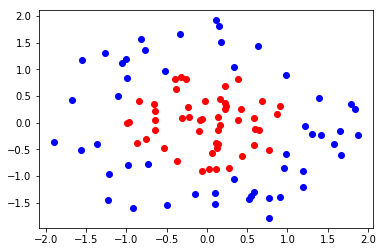

In [348]:
# create data, take a uniform distribution on [0,1]x[0,2\pi], scale 1st coord by sqrt( to get uniform dist on disk) and map to circle using polar coords

n= 50 #number of samples
x= np.random.uniform(0,1,n)
x=x**0.5
y= np.random.uniform(0,2*np.pi,n)
yd=x*np.sin(y)
xd=x*np.cos(y)
X1= np.vstack((xd,yd)).T
X1lbl=-1*np.ones(n)

#similarly for annulus
x= np.random.uniform(1,4,n)
x=x**0.5
y= np.random.uniform(0,2*np.pi,n)
yd=x*np.sin(y)
xd=x*np.cos(y)
X2= np.vstack((xd,yd)).T
X2lbl=np.ones(n)
#label X1 by -1 and X2 by 1


X_Data = np.concatenate((X1,X2))
Y_Data = np.concatenate((X1lbl,X2lbl))

plt.plot(X_Data[Y_Data==-1][:,0],X_Data[Y_Data==-1][:,1],'ro',X_Data[Y_Data==1][:,0],X_Data[Y_Data==1][:,1],'bo')

#circle1=plt.Circle((0,0),2,color='g')
#plt.gcf().gca().add_artist(circle1)
#circle2=plt.Circle((0,0),1,color='y')
#plt.gcf().gca().add_artist(circle2)
plt.show()

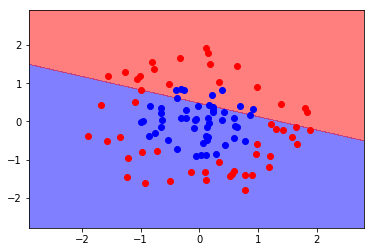

In [349]:
conplot(X_Data,Y_Data,100,10)
plt.show()

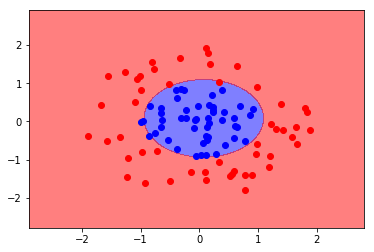

In [350]:
X_Trans = np.stack((X_Data[:,0],X_Data[:,1],X_Data[:,0]**2+X_Data[:,1]**2)).T

conplot3(X_Trans,Y_Data,100,10)
plt.show()

The map $\phi$ gives us a  

# Task 2.7

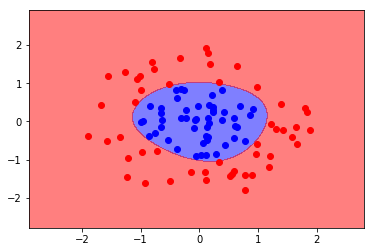

In [351]:
def SVMfunc_NL(z, x, y, beta, bias, kernel):
    ans=bias+(y*(kernel(z,x)))@beta
    return(ans)

def OneStep_NL(i,j, x, y, beta, bias, C,kernel):
    delta = y[i]*((SVMfunc_NL(x[j], x, y, beta, bias,kernel)-y[j]) - (SVMfunc_NL(x[i], x, y, beta, bias,kernel) - y[i]))
    s = y[i]*y[j]
    chi = kernel(x[i],x[i]) + kernel(x[j],x[j]) - 2*kernel(x[i],x[j])
    gamma = s*beta[i] + beta[j]
    
    if s==1:
        L= max(0, gamma -1*C)
        H = min(gamma, C)
    
    else:
        L = max(0, -1*gamma)
        H = min(C, C-gamma)
    
    if chi>0:
        beta[i] = min(max(beta[i] + delta/chi, L), H)
    elif delta > 0:
        beta[i] = L
    else:
        beta[i] = H
        
    beta[j] = gamma - s * beta[i]
    bias = bias - 0.5 * (SVMfunc_NL(x[j], x, y, beta, bias, kernel) - y[j] + SVMfunc_NL(x[i], x, y, beta, bias,kernel) - y[i])
    return (beta, bias)


def SMO_NL(x, y, iterations, C,kernel):
    n = len(x)
    beta = np.zeros(n)
    bias = 0
    
    for k in range(iterations):
        #picks two non equal integers from 0 to n
        i, j = np.random.choice(n, 2)
        
        #updates beta and bias according to onestep algorithm
        beta, bias = OneStep_NL(i,j, x, y, beta, bias, C,kernel)
    
    s=(SVMfunc_NL(x,x,y,beta,bias,kernel)-y)[beta!=0]
    bias=bias-np.median(s)
    
    return (beta,bias)

def norm(x):
    return np.sum(x*x,axis=len(x.shape)-1)
    
def GaussKernel(z,x,sigma):
    xt=x.reshape(tuple(np.ones(len(z.shape)-1).astype(int))+x.shape)
    zt=z.reshape(z.shape[:-1]+(1,)+(z.shape[-1],))  
    return np.exp(-norm(zt-xt)/(2*sigma**2))

def ScalarProdKernel(z,x):
    return z@x.T

def Gauss1(z,x):
    return GaussKernel(z,x,1)

def conplot_NL(x,y,iterations,C,kernel):
    beta,bias=SMO_NL(x,y,iterations,C,kernel)
    
    maxx = np.amax(x[:,0])
    maxy = np.amax(x[:,1])
    minx = np.amin(x[:,0])
    miny = np.amin(x[:,1])    
    t = np.arange(minx-1, maxx+1, 0.1)
    s = np.arange(miny-1, maxy+1, 0.1)
    p,q = np.meshgrid(t, s)
    z = SVMfunc_NL(np.stack((p,q), axis=2),x,y,beta,bias,kernel)
    plt.contourf(t,s,z,[-99999,0,99999], colors=['blue','red'],alpha=0.5)
    plt.plot(x[y==-1][:,0],x[y==-1][:,1],'bo',x[y==1][:,0],x[y==1][:,1],'ro')
    
conplot_NL(X_Data,Y_Data,1000,10,Gauss1)
plt.show()

# Task 2.8

In [352]:
#Load MNIST Data
import os
import gzip
from urllib.request import urlretrieve

def download(filename , source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve (source + filename , filename)
    

def load_mnist_images (filename):
    if not os.path.exists(filename ):
        download(filename)
    with gzip.open(filename , 'rb') as f:
        data = np. frombuffer (f.read (), np.uint8 , offset=16)
    data = data.reshape (-1, 28, 28)
    return data / np.float32 (256)

def load_mnist_labels (filename):
    if not os.path.exists(filename ):
        download(filename)
    with gzip.open(filename , 'rb') as f:
        data = np. frombuffer (f.read (), np.uint8 , offset=8)
    return data

X_train = load_mnist_images('train-images-idx3-ubyte.gz')
y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')


In [353]:
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV


def Sample(n,X,Y):
    TrainSize=np.size(Y)
    Choice=np.random.choice(TrainSize,n)
    return (X[Choice,:],Y[Choice])
    
def CrossValidation(X_train,y_train):
    X_validate,y_validate=Sample(500,X_train,y_train)
    
    para= {'C':[1,10,100], 'gamma':[0.1,0.01,0.001]}
    svc = svm.SVC()
    Searchclf = GridSearchCV(svc, para, cv=5)
    Searchclf.fit(X_validate, y_validate)
    
    return Searchclf.best_params_

def SciKitSVM(X_train,y_train,X_test,y_test):
    X_test=X_test.reshape(X_test.shape[0],28*28)
    X_train=X_train.reshape(X_train.shape[0],28*28)
    
    X_trainSubset,y_trainSubset=Sample(2000,X_train,y_train)
    
    params=CrossValidation(X_train,y_train)   
    clf = svm.SVC(C=params['C'],gamma=params['gamma'])

    clf.fit(X_trainSubset, y_trainSubset)
    y_pred = clf.predict(X_test)
    conf= metrics.confusion_matrix(y_test,y_pred)

    print(conf)
    print(np.trace(conf)/y_test.size)
    
SciKitSVM(X_train,y_train,X_test,y_test)



ImportError: cannot import name '_ellipsoid'

Is our approach of picking a different training set in step (b) – and learning
with the optimal parameters from (a) – valid? Are there potential pitfalls?

The approach is valid. We assume the data from a) and b) are both drawn from the same probability distribution so optimality for a) should carry over to the data used in b). Since we train many times to optimise parameters its only paractical with smaller subsets but when we train using the optimal parameters we can use much more data practically. Doing it this way should also help avoid overfitting. 

If our data set in a) is not a good representation of all the data, perhaps too small or not random, this could give us bad parameters which could make our final predictor much less accurate.

# Nonsese

(10, 2) (10,)


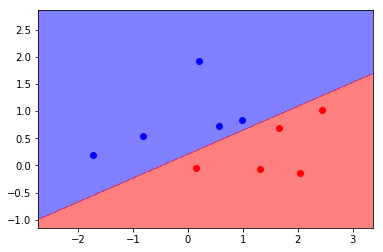

In [213]:
SampleSize = 5
meana=np.array([1.5, 0])
meanb= np.array([0,1.5])
var=np.eye(2,2)
a= np.random.multivariate_normal(meana, var, SampleSize)
b= np.random.multivariate_normal(meanb, var, SampleSize)
x=np.concatenate((a,b))
y=np.array([1,1,1,1,1,-1,-1,-1,-1,-1])

print(x.shape,y.shape)
conplot(x,y,100,10)
plt.show()

In [337]:
x=np.ones((3,2))
z=np.ones((4,7,2))



zt=z.reshape((4,7,1,2))
xt=x.reshape((1,1,3,2))

tx=x.reshape(tuple(np.ones(len(z.shape)-1).astype(int))+x.shape)
zt=z.reshape(z.shape[:-1]+(1,)+(z.shape[-1],))

print(norm((zt-xt)).shape)

(4, 7, 3)
